In [1]:
import math
import statistics
import random
from scipy import stats as sps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.descriptivestats import sign_test
%matplotlib inline

In [2]:
df = pd.read_excel('data_matstat_K5.xls', sheet_name = 'D - homedat')

In [3]:
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13
0,2050,2243,2289,2650,13,7,north,Y,6.421,4.9671,2,Y,1639
1,2080,2255,2355,2600,8,4,north,Y,7.185,4.9671,2,Y,1088
2,2150,2307,2443,2664,6,5,north,Y,6.998,6.0622,3,Y,1193
3,2150,2232,2351,2921,3,6,north,Y,7.147,6.0622,3,Y,1635
4,1999,2054,2113,2580,4,4,north,Y,6.430,6.0622,3,Y,1732


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
D1     117 non-null int64
D2     117 non-null int64
D3     117 non-null int64
D4     117 non-null int64
D5     117 non-null int64
D6     117 non-null int64
D7     117 non-null object
D8     117 non-null object
D9     117 non-null float64
D10    117 non-null float64
D11    117 non-null int64
D12    117 non-null object
D13    117 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 12.0+ KB


* D1 — Appraisal price1 ($hundreds)


* D2 — Appraisal price2 ($hundreds) 


* D3 — Appraisal price3 ($hundreds)


* D4 — Square feet of living space


* D5 — Age of home (years)


* D6 — Number out of 11 features (dishwasher, refrigerator, microwave, disposer, washer, intercom, skylight(s), compactor, dryer, handicap fit, cable TV access)


* D7 — Location in sector of city


* D8 — Corner location


* D9 — Nitric oxides concentration


* D10 — Weighted distances to five city employment centres


* D11 — Index of accessibility to radial highways


* D12 — River adjacency


* D13 — Annual taxes ($)

### Задание 1.1

In [5]:
df.describe()

,D1,D2,D3,D4,D5,D6,D9,D10,D11,D13
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1062.735043,1166.461538,1260.444444,1653.854701,14.076923,3.529915,6.229863,4.778577,4.205128,789.923077
std,380.436985,383.265024,388.552274,523.722802,10.451987,1.405486,0.466012,1.622032,1.367974,298.884655
min,540.000000,594.000000,690.000000,837.000000,1.000000,0.000000,5.399000,2.106900,2.000000,223.000000
25%,780.000000,904.000000,1002.000000,1280.000000,6.000000,3.000000,5.928000,3.615000,3.000000,600.000000
50%,960.000000,1067.000000,1139.000000,1549.000000,12.000000,4.000000,6.140000,4.498600,4.000000,733.000000
75%,1200.000000,1286.000000,1404.000000,1894.000000,17.000000,4.000000,6.421000,5.870000,5.000000,915.000000
max,2150.000000,2307.000000,2443.000000,3750.000000,53.000000,8.000000,8.069000,9.222900,8.000000,1765.000000


In [6]:
sps.describe(df['D1'])

DescribeResult(nobs=117, minmax=(540, 2150), mean=1062.7350427350427, variance=144732.2998821102, skewness=1.3577070081186777, kurtosis=1.3354933162777254)

In [7]:
sps.describe(df['D5'])

DescribeResult(nobs=117, minmax=(1, 53), mean=14.076923076923077, variance=109.2440318302387, skewness=1.5133848464639645, kurtosis=2.2705010406397275)

In [8]:
sps.describe(df['D6'])

DescribeResult(nobs=117, minmax=(0, 8), mean=3.52991452991453, variance=1.9753905098732687, skewness=0.08827317090579796, kurtosis=0.5266401067036028)

### Задание 1.2

In [9]:
n = len(df['D1'])
n

117

Формула Стерджесса:

In [10]:
k = 1 + math.log2(n)

print(k)
print(int(k)) # число групп

7.870364719583405
7


In [11]:
# шаг интервала

h = int((df['D1'].max() - df['D1'].min()) / int(k))
h

230

In [12]:
df['D1'].max() - df['D1'].min()

1610

In [13]:
df['D1'].head(15)

0     2050
1     2080
2     2150
3     2150
4     1999
5     1900
6     1800
7     1560
8     1450
9     1449
10    1375
11    1270
12    1250
13    1235
14    1170
Name: D1, dtype: int64

In [14]:
df['D1'].max()

2150

In [15]:
df['D1'].min()

540

In [16]:
# frequencies

[27. 38. 23. 14.  4.  4.  7.]
[ 770. 1000. 1230. 1460. 1690. 1920. 2150.]
[ 540.  770. 1000. 1230. 1460. 1690. 1920.]


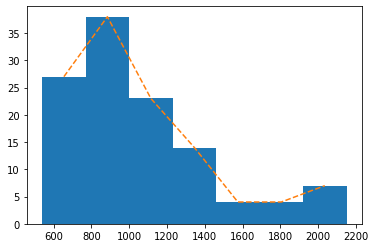

In [17]:
freq, edges, _ = plt.hist(df['D1'], bins=7)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(freq)
print(edges[1:]) # верхние границы
print(edges[:-1]) # нижние границы
plt.plot(midpoints, freq, '--');

In [18]:
# relative frequencies

[0.23076923 0.32478632 0.1965812  0.11965812 0.03418803 0.03418803
 0.05982906]


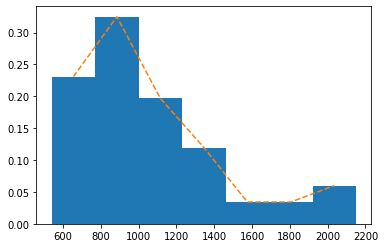

In [19]:
rel_freq, edges, _ = plt.hist(df['D1'], bins=7, weights=np.zeros_like(df['D1']) + 1. / n)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(rel_freq)
plt.plot(midpoints, rel_freq, '--');

In [20]:
# cumulative frequencies

[ 27.  65.  88. 102. 106. 110. 117.]


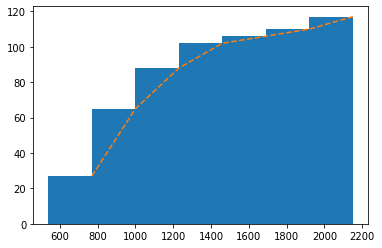

In [21]:
cum_freq, edges, _ = plt.hist(df['D1'], bins=7, cumulative=True)
print(cum_freq)
plt.plot(edges[1:], cum_freq, '--');

In [22]:
# relative cumulative frequencies

[0.23076923 0.55555556 0.75213675 0.87179487 0.90598291 0.94017094
 1.        ]


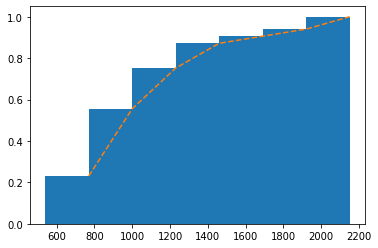

In [23]:
rel_cum_freq, edges, _ = plt.hist(df['D1'], bins=7, weights=np.zeros_like(df['D1']) + 1. / n, cumulative=True)
print(rel_cum_freq)
plt.plot(edges[1:], rel_cum_freq, '--');

In [24]:
# ECDF

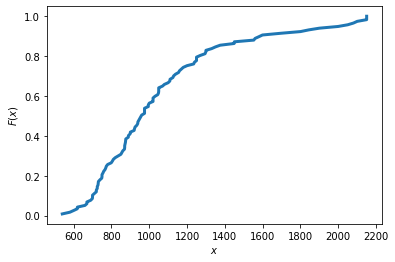

In [25]:
ecdf_1 = ECDF(df['D1'])
plt.plot(ecdf_1.x, ecdf_1.y, lw=3)
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### Задание 2

In [26]:
alphas = [0.01, 0.05, 0.1]

#### Задание 2.1

In [27]:
for alpha in alphas:
    interval = (df['D1'].std() / (n ** 0.5)) * sps.t.ppf(1 - alpha / 2, n - 1)
    print(alpha)
    print('  lower edge:', df['D1'].mean() - interval)
    print('  higher edge:', df['D1'].mean() + interval)

0.01
  lower edge: 970.6254151429223
  higher edge: 1154.8446703271632
0.05
  lower edge: 993.0736300913798
  higher edge: 1132.3964553787057
0.1
  lower edge: 1004.4174746014318
  higher edge: 1121.0526108686536


In [28]:
df['D1'].mean()

1062.7350427350427

#### Задание 2.2

In [29]:
for alpha in alphas:
    lower_edge = (n - 1) * df['D1'].var() /(sps.chi2.ppf(1 - alpha / 2, n - 1))
    higher_edge = df['D1'].var() * (n - 1) /(sps.chi2.ppf(alpha / 2, n - 1))
    print(alpha)

    print('  lower edge:', lower_edge)
    print('  higher edge:', higher_edge)
    print()

0.01
  lower edge: 105606.03863704317
  higher edge: 208500.99389153466

0.05
  lower edge: 113669.06878932094
  higher edge: 190602.276810545

0.1
  lower edge: 118117.09664537023
  higher edge: 182223.60893777115



In [30]:
df['D1'].var()

144732.29988211024

#### Задание 2.3

In [31]:
alphas = [0.01, 0.05, 0.1]

In [32]:
s = (((len(df['D1']) - 1) * df['D1'].var() + \
      (len(df['D2']) - 1) * df['D2'].var()) / \
      (len(df['D1']) + len(df['D2']) - 2)) ** 0.5
for alpha in alphas:
    interval = sps.t.ppf(1 - alpha / 2, len(df['D1']) + len(df['D2']) - 2) * \
    s * (1 / len(df['D1']) + 1 / len(df['D2'])) ** 0.5

    print(alpha)

    print('  lower edge:', (df['D1'].mean() - df['D2'].mean()) - interval)
    print('  higher edge:', (df['D1'].mean() - df['D2'].mean()) + interval)
    print()

0.01
  lower edge: -233.39129984183882
  higher edge: 25.938308388847133

0.05
  lower edge: -202.09103014483668
  higher edge: -5.361961308155017

0.1
  lower edge: -186.17521270052325
  higher edge: -21.277778752468436



In [33]:
df['D1'].mean() - df['D2'].mean()

-103.72649572649584

#### Задание 2.4

In [34]:
for alpha in alphas:
    lower_edge = (df['D1'].var() / df['D2'].var()) * (sps.f.ppf(alpha / 2, len(df['D2']) - 1, n - 1))
    higher_edge = (df['D1'].var() / df['D2'].var()) * (sps.f.ppf(1- alpha / 2, len(df['D2']) - 1, n - 1))
    print(alpha)

    print('  lower edge:', lower_edge)
    print('  higher edge:', higher_edge)
    print()

0.01
  lower edge: 0.6086836051247635
  higher edge: 1.594933469837988

0.05
  lower edge: 0.6834763195091621
  higher edge: 1.4204001318616584

0.1
  lower edge: 0.7250537238003864
  higher edge: 1.3389488564607488



In [35]:
df['D1'].var() / df['D2'].var()

0.9852968356567146

### Задание 3

In [36]:
df['D1'].describe()

count     117.000000
mean     1062.735043
std       380.436985
min       540.000000
25%       780.000000
50%       960.000000
75%      1200.000000
max      2150.000000
Name: D1, dtype: float64

#### 3.1 t-test 1 sample

In [37]:
sps.ttest_1samp(df['D1'], 900)

Ttest_1sampResult(statistic=4.626912445708453, pvalue=9.732412519177559e-06)

In [38]:
sps.ttest_1samp(df['D1'], 1063)

Ttest_1sampResult(statistic=-0.007533313330723074, pvalue=0.9940022828366375)

In [39]:
sps.ttest_1samp(df['D1'], 1200)

Ttest_1sampResult(statistic=-3.9027423255292946, pvalue=0.0001600412580532881)

In [40]:
if (sps.ttest_1samp(df['D1'], 900)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [41]:
if (sps.ttest_1samp(df['D1'], 1063)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [42]:
if (sps.ttest_1samp(df['D1'], 1200)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


#### 3.2 chisquare (m - неизвестно)

In [43]:
def one_sample_chi_test_unknown(x, sigma0):
    S_squared = 1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])
    z = (len(x) - 1) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x)-1)
    return z, 2 * min(f, 1 - f)

In [44]:
print(one_sample_chi_test_unknown(df['D1'], 380))

(116.26694450363426, 0.9511276194516962)


In [45]:
print(one_sample_chi_test_unknown(df['D1'], 381))

(115.65742028730023, 0.9830191460535891)


In [46]:
print(one_sample_chi_test_unknown(df['D1'], 460))

(79.34284870663889, 0.00746371825488968)


In [47]:
if (one_sample_chi_test_unknown(df['D1'], 380)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [48]:
if (one_sample_chi_test_unknown(df['D1'], 381)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [49]:
if (one_sample_chi_test_unknown(df['D1'], 460)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


#### 3.3 t-test: $ m_1 = m_2 $

In [50]:
df['D1'].describe()

count     117.000000
mean     1062.735043
std       380.436985
min       540.000000
25%       780.000000
50%       960.000000
75%      1200.000000
max      2150.000000
Name: D1, dtype: float64

In [51]:
df['D2'].describe()

count     117.000000
mean     1166.461538
std       383.265024
min       594.000000
25%       904.000000
50%      1067.000000
75%      1286.000000
max      2307.000000
Name: D2, dtype: float64

In [52]:
def two_sample_t_test(x, y):
    S_1 = (1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])) 
    S_2 = (1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y]))
    S = ((len(x) - 1) * S_1 + (len(y) - 1) * S_2) / (len(x) + len(y) - 2)
    z = (x.mean() - y.mean()) * (1 / len(x) + 1 / len(y)) ** 0.5 / S ** 0.5
    f = sps.t.cdf(z, df=len(x)+len(y)-2)
    return z, 2 * min(f, 1 - f)

In [53]:
print(two_sample_t_test(df['D1'], df['D2']))

(-0.03551524851622991, 0.9716994257968214)


In [54]:
if (two_sample_t_test(df['D1'], df['D2'])[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [55]:
if (two_sample_t_test(df['D1'], df['D2'])[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [56]:
if (two_sample_t_test(df['D1'], df['D2'])[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


#### 3.4 F-test: $ \sigma_1 = \sigma_2 $

In [57]:
# f-test: var_1 = var_2 (means are unknown)
def two_sample_f_test(x, y):
    S_1 = 1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])
    S_2 = 1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y])
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x)-1, dfd=len(y)-1)
    return z, 2 * min(f, 1 - f)

In [58]:
print(two_sample_f_test(df['D1'], df['D2']))

(0.9852968356567146, 0.9365595818669057)


In [59]:
if (two_sample_f_test(df['D1'], df['D2'])[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [60]:
if (two_sample_f_test(df['D1'], df['D2'])[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [61]:
if (two_sample_f_test(df['D1'], df['D2'])[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


### Задание 4

#### Задание 4.1

In [62]:
k = 1 + math.log2(n)

print(k)
print(int(k)) # число групп

7.870364719583405
7


In [63]:
# шаг интервала

h = int((df['D1'].max() - df['D1'].min()) / int(k))
h

230

In [64]:
# frequencies

[27. 38. 23. 14.  4.  4.  7.]
[ 770. 1000. 1230. 1460. 1690. 1920. 2150.]
[ 540.  770. 1000. 1230. 1460. 1690. 1920.]


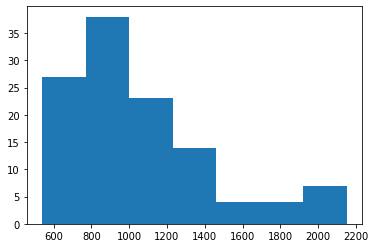

In [65]:
freq, edges, _ = plt.hist(df['D1'], bins=7)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(freq)
print(edges[1:]) # верхние границы
print(edges[:-1]) # нижние границы

In [66]:
# relative frequencies

[0.23076923 0.32478632 0.1965812  0.11965812 0.03418803 0.03418803
 0.05982906]


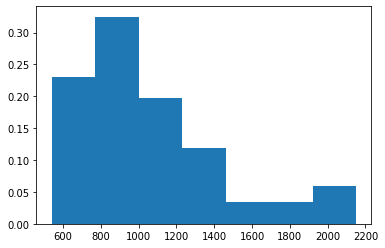

In [67]:
rel_freq, edges, _ = plt.hist(df['D1'], bins=7, weights=np.zeros_like(df['D1']) + 1. / n)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(rel_freq)

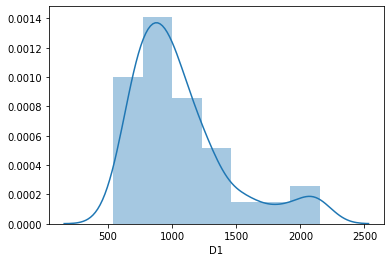

In [68]:
sns_plot = sns.distplot(df['D1'], bins=7)
fig = sns_plot.get_figure()

In [69]:
k = 1 + math.log2(n)

print(k)
print(int(k)) # число групп

7.870364719583405
7


In [70]:
# шаг интервала

h = int((df['D1'].max() - df['D1'].min()) / int(k))
h

230

Сгенерируем выборку, имеющую нормальное распределение:

In [71]:
# norm_distr = sps.norm.rvs(size=n, loc=df['D1'].mean(), scale=df['D1'].std())

In [72]:
# norm_distr

In [73]:
norm = np.array([ 832.4506857 , 1256.11587943, 1308.61751986, 1287.93163111,
       1421.87523674, 1126.58526635,  955.17608098, 1469.73449581,
       1317.76324816,  440.93218313,  832.81710474, 1158.3327054 ,
       1489.93658936, 1280.85094662, 1038.93604286, 1004.98593086,
       1035.85100021,  816.34782223, 1789.52429064, 1113.53443154,
        629.64900375,  737.03344503, 1247.84775342, 1478.46224022,
        908.50703623, 1149.44849686, 1575.2042677 , 1218.2012319 ,
        986.13383724, 1126.34233551, 1251.16127301, 1496.40649618,
        372.57984274,  722.59452914, 1308.14623565, 1288.7185144 ,
        461.91622173, 1220.63070062, 1040.2038548 ,  495.2532603 ,
        765.20699591,  760.89452492,  973.84836217, 1768.37905682,
        135.17079437,  859.97222958, 1099.60574181,  880.29904583,
        968.80976143, 1235.65935493, 1429.62410722, 1144.16281291,
        722.4439374 ,  620.77134339,  828.57458929, 1402.53963296,
        737.92899784,  856.36759052, 1251.87562662,  975.91486099,
       1493.75803093, 1873.03888881, 1056.91948338, 1192.65937996,
        809.45062844,  960.11084839,  874.04910179, 1052.42137938,
       1199.85989202, 1219.4431593 , 1798.49139136,  268.8105626 ,
       1406.83860035,  937.25492118, 1016.04330951, 1285.26713957,
        557.52439391,  773.5843548 , 1414.87755527,  384.11782171,
       1882.98575305,  870.23929765, 1408.49511765, 1152.16570035,
       1001.23905854, 1281.0792234 ,  515.12477989, 2041.95126703,
        656.02259422, 1665.36338688, 1369.23687692, 1084.03064342,
       1140.88888074, 1565.45858259,  748.65091329,  933.46857865,
       1012.86484095, 1379.4281887 , 1148.59235026,  535.24001605,
       1192.50613654, 1162.35129334, 1635.35786804,  545.5354864 ,
        635.14484972, 1972.19048202, 1302.9726228 ,  856.61858931,
        823.92462792, 1222.6739568 ,  931.21597141, 1675.93854553,
        456.24484555, 1492.37604567, 1100.70001587, 1374.38296056,
       1170.77103349])

Строим таблицу частот

In [74]:
# посмотрели границы, которые пересекаются для обоих графиков
left = min(min(df['D1']), min(norm))
right = max(max(df['D1']), max(norm))
step = (right - left) / 7
bins = [left + step * i for i in range(0, 7 + 1)]

In [75]:
# frequencies

[ 0. 13. 52. 29. 10.  5.  5.]
[ 423.00353803  710.83628169  998.66902535 1286.50176902 1574.33451268
 1862.16725634 2150.        ]
[ 135.17079437  423.00353803  710.83628169  998.66902535 1286.50176902
 1574.33451268 1862.16725634]

[ 4. 12. 30. 38. 22.  7.  4.]
[ 423.00353803  710.83628169  998.66902535 1286.50176902 1574.33451268
 1862.16725634 2150.        ]
[ 135.17079437  423.00353803  710.83628169  998.66902535 1286.50176902
 1574.33451268 1862.16725634]


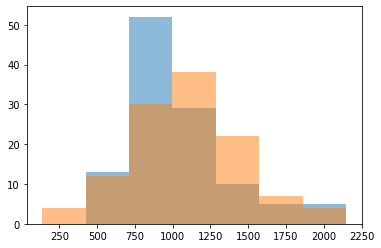

In [76]:
freq_1, edges_1, _ = plt.hist(df['D1'], bins=bins, alpha=0.5)
print(freq_1)
print(edges_1[1:]) # верхние границы
print(edges_1[:-1]) # нижние границы
print()

freq_2, edges_2, _ = plt.hist(norm, bins=bins, alpha=0.5)
print(freq_2)
print(edges_2[1:]) # верхние границы
print(edges_2[:-1]) # нижние границы

In [77]:
# relative frequencies

[0.         0.11111111 0.44444444 0.24786325 0.08547009 0.04273504
 0.04273504]
[ 423.00353803  710.83628169  998.66902535 1286.50176902 1574.33451268
 1862.16725634 2150.        ]
[ 135.17079437  423.00353803  710.83628169  998.66902535 1286.50176902
 1574.33451268 1862.16725634]

[0.03418803 0.1025641  0.25641026 0.32478632 0.18803419 0.05982906
 0.03418803]
[ 423.00353803  710.83628169  998.66902535 1286.50176902 1574.33451268
 1862.16725634 2150.        ]
[ 135.17079437  423.00353803  710.83628169  998.66902535 1286.50176902
 1574.33451268 1862.16725634]


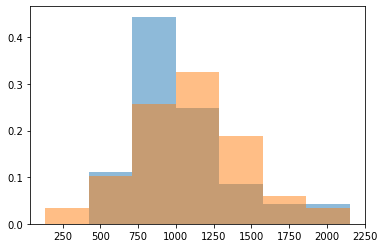

In [78]:
rel_freq_1, edges_1, _ = plt.hist(df['D1'], bins=bins, alpha=0.5, weights=np.zeros_like(df['D1']) + 1. / n)
print(rel_freq_1)
print(edges_1[1:]) # верхние границы
print(edges_1[:-1]) # нижние границы
print()

rel_freq_2, edges_2, _ = plt.hist(norm, bins=bins, alpha=0.5, weights=np.zeros_like(norm) + 1. / n)
print(rel_freq_2)
print(edges_2[1:]) # верхние границы
print(edges_2[:-1]) # нижние границы

In [79]:
# шаг интервала (новый)
step

287.83274366142854

In [80]:
# вероятность попадания в диапазон
loc=df['D1'].mean()
scale=df['D1'].std()

probs = [sps.norm.cdf(edges[i], loc=loc, scale=scale) - \
         sps.norm.cdf(edges[i - 1], loc=loc, scale=scale)
         for i in range(1, int(k) + 1)]
print(probs)

[0.13609214692215943, 0.21370330732455395, 0.2353999176037641, 0.18190101507278056, 0.09859455413672424, 0.03747624248154746, 0.009985917421687085]


In [81]:
# частоты
f_1 = [ 0., 13., 52., 29., 10.,  5.,  5.]
f_2 = [ 4., 12., 30., 38., 22.,  7.,  4.]

In [82]:
sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)

Power_divergenceResult(statistic=29.715128730918206, pvalue=5.593430734493954e-06)

In [83]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [84]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [85]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


#### Задание 4.2

In [86]:
sps.describe(df['D1'])

DescribeResult(nobs=117, minmax=(540, 2150), mean=1062.7350427350427, variance=144732.2998821102, skewness=1.3577070081186777, kurtosis=1.3354933162777254)

$ N(0, 1): $ skewness = 0, kurtosis = 3

In [87]:
sps.jarque_bera(df['D1'])

(44.64045142732867, 2.0251123000747384e-10)

In [88]:
if (sps.jarque_bera(df['D1'])[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [89]:
if (sps.jarque_bera(df['D1'])[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [90]:
if (sps.jarque_bera(df['D1'])[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


В дополнение, чтобы понять, в каком из 2-х первых тестов вероятнее всего ошибка:

In [91]:
sps.normaltest(df['D1'])

NormaltestResult(statistic=30.867672679032715, pvalue=1.9823030224704876e-07)

In [92]:
sps.kstest(df['D1'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [93]:
sps.shapiro(df['D1'])

(0.8615155816078186, 4.560787303375946e-09)

**Вывод:** скорее всего, гипотеза отклоняется. Все тесты показали именно это.

### Задание 5

#### Задание 5.1

In [94]:
sign_test(df['D1'], df['D2'])

(-58.5, 1.2037062152420224e-35)

In [95]:
sps.wilcoxon(df['D1'], df['D2'], alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=6.141719974490892e-21)

In [96]:
if (sign_test(df['D1'], df['D2'])[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [97]:
if (sign_test(df['D1'], df['D2'])[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [98]:
if (sign_test(df['D1'], df['D2'])[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


#### Задание 5.2

In [99]:
k = 1 + math.log2(n)

print(k)
print(int(k)) # число групп

7.870364719583405
7


In [100]:
# шаг интервала

h = int((df['D1'].max() - df['D1'].min()) / int(k))
h

230

Строим таблицу частот

In [101]:
# посмотрели границы, которые пересекаются для обоих графиков
left = min(min(df['D1']), min(df['D2']))
right = max(max(df['D1']), max(df['D2']))
step = (right - left) / 7
bins = [left + step * i for i in range(0, 7 + 1)]

In [102]:
# frequencies

[30. 40. 25.  7.  6.  4.  5.]
[ 792.42857143 1044.85714286 1297.28571429 1549.71428571 1802.14285714
 2054.57142857 2307.        ]
[ 540.          792.42857143 1044.85714286 1297.28571429 1549.71428571
 1802.14285714 2054.57142857]

[10. 43. 35. 13.  5.  5.  6.]
[ 792.42857143 1044.85714286 1297.28571429 1549.71428571 1802.14285714
 2054.57142857 2307.        ]
[ 540.          792.42857143 1044.85714286 1297.28571429 1549.71428571
 1802.14285714 2054.57142857]


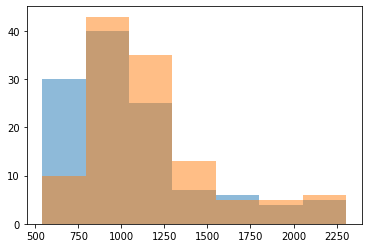

In [103]:
freq_1, edges_1, _ = plt.hist(df['D1'], bins=bins, alpha=0.5)
print(freq_1)
print(edges_1[1:]) # верхние границы
print(edges_1[:-1]) # нижние границы
print()

freq_2, edges_2, _ = plt.hist(df['D2'], bins=bins, alpha=0.5)
print(freq_2)
print(edges_2[1:]) # верхние границы
print(edges_2[:-1]) # нижние границы

In [104]:
# relative frequencies

[0.25641026 0.34188034 0.21367521 0.05982906 0.05128205 0.03418803
 0.04273504]
[ 792.42857143 1044.85714286 1297.28571429 1549.71428571 1802.14285714
 2054.57142857 2307.        ]
[ 540.          792.42857143 1044.85714286 1297.28571429 1549.71428571
 1802.14285714 2054.57142857]

[0.08547009 0.36752137 0.2991453  0.11111111 0.04273504 0.04273504
 0.05128205]
[ 792.42857143 1044.85714286 1297.28571429 1549.71428571 1802.14285714
 2054.57142857 2307.        ]
[ 540.          792.42857143 1044.85714286 1297.28571429 1549.71428571
 1802.14285714 2054.57142857]


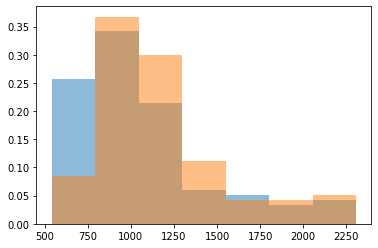

In [105]:
rel_freq_1, edges_1, _ = plt.hist(df['D1'], bins=bins, alpha=0.5, weights=np.zeros_like(df['D1']) + 1. / n)
print(rel_freq_1)
print(edges_1[1:]) # верхние границы
print(edges_1[:-1]) # нижние границы
print()

rel_freq_2, edges_2, _ = plt.hist(df['D2'], bins=bins, alpha=0.5, weights=np.zeros_like(df['D2']) + 1. / n)
print(rel_freq_2)
print(edges_2[1:]) # верхние границы
print(edges_2[:-1]) # нижние границы

In [106]:
# шаг интервала (новый)
step

252.42857142857142

In [107]:
# частоты
f_1 = [30., 40., 25.,  7.,  6.,  4.,  5.]
f_2 = [10., 43., 35., 13.,  5.,  5.,  6.]

In [108]:
sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)

Power_divergenceResult(statistic=46.40234261862169, pvalue=2.030933543192438e-09)

In [109]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [110]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [111]:
if (sps.chisquare(f_obs=f_1, f_exp=f_2, ddof=2)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


В дополнение, чтобы понять, в каком из 2-х первых тестов вероятнее всего ошибка:

In [112]:
sps.ks_2samp(df['D1'], df['D2'], alternative='two-sided')

Ks_2sampResult(statistic=0.2222222222222222, pvalue=0.006048763280613777)

In [113]:
sps.ranksums(df['D1'], df['D2'])

RanksumsResult(statistic=-2.781207054109696, pvalue=0.005415718377644362)

In [114]:
sps.mannwhitneyu(df['D1'], df['D2'], alternative='two-sided')

MannwhitneyuResult(statistic=5404.5, pvalue=0.005431284787793249)

**Вывод:** скорее всего, гипотеза отклоняется. Все тесты показали именно это.

### Задание 6

In [115]:
df['D7'].unique()

array(['north', 'south', 'other'], dtype=object)

In [116]:
df['D8'].unique()

array(['Y', 'N'], dtype=object)

Суммы:

In [117]:
df.groupby('D7')['D7'].count()

D7
north    41
other    31
south    45
Name: D7, dtype: int64

In [118]:
df.groupby('D7')['D7'].count().sum()

117

In [119]:
df.groupby('D8')['D8'].count()

D8
N    90
Y    27
Name: D8, dtype: int64

Строки:

In [120]:
north = df[df['D7'] == 'north']

In [121]:
south = df[df['D7'] == 'south']

In [122]:
other = df[df['D7'] == 'other']

In [123]:
n = north.groupby('D8')['D8'].count()
n

D8
N    29
Y    12
Name: D8, dtype: int64

In [124]:
s = south.groupby('D8')['D8'].count()
s

D8
N    35
Y    10
Name: D8, dtype: int64

In [125]:
o = other.groupby('D8')['D8'].count()
o

D8
N    26
Y     5
Name: D8, dtype: int64

In [126]:
# эмпирическая
table = np.array([n, s, o])
table

array([[29, 12],
       [35, 10],
       [26,  5]])

In [127]:
# теоретическая
sps.chi2_contingency(table)[3]

array([[31.53846154,  9.46153846],
       [34.61538462, 10.38461538],
       [23.84615385,  7.15384615]])

In [128]:
sps.chi2_contingency(table)[3].sum(axis=0) # суммы по столбцам

array([90., 27.])

In [129]:
sps.chi2_contingency(table)[3].sum(axis=1) # суммы по строкам

array([41., 45., 31.])

In [130]:
sps.chi2_contingency(table)[3].sum()

117.0

In [131]:
sps.chi2_contingency(table)[0:3] # statistic, p-value, ddof

(1.7468951248652274, 0.41750967453006105, 2)

In [132]:
if (sps.chi2_contingency(table)[1] < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [133]:
if (sps.chi2_contingency(table)[1] < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [134]:
if (sps.chi2_contingency(table)[1] < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


Статистическая гипотеза об отсутствии статистической связи между признаками D7 и D8 **подтвердилась** $ \Rightarrow $ признаки независимы.

### Задание 7

In [135]:
df['D7'].unique()

array(['north', 'south', 'other'], dtype=object)

Суммы:

In [136]:
df.groupby('D7')['D7'].count()

D7
north    41
other    31
south    45
Name: D7, dtype: int64

In [137]:
north = df[df['D7'] == 'north']

In [138]:
south = df[df['D7'] == 'south']

In [139]:
other = df[df['D7'] == 'other']

In [140]:
# групповые средние
north_mean = north['D1'].mean()
south_mean = south['D1'].mean()
other_mean = other['D1'].mean()

print(north_mean)
print(south_mean)
print(other_mean)

1259.0731707317073
926.1555555555556
1001.3225806451613


In [141]:
# общее среднее
mean = df['D1'].mean()
mean

1062.7350427350427

In [142]:
# групповые дисперсии
north_var = north['D1'].var()
south_var = south['D1'].var()
other_var = other['D1'].var()

print(north_var)
print(south_var)
print(other_var)

175188.5695121951
85783.22525252523
115670.09247311827


In [143]:
# общая дисперсия
groups = [north['D1'], south['D1'], other['D1']]
D_x = 0

for group in groups:
    for i in group:
        D_x += (i - mean) ** 2
D_x /= len(df['D1'])

In [144]:
D_x

143495.27167798963

In [145]:
print(len(north))
print(len(south))
print(len(other))

41
45
31


In [146]:
n = len(df['D1'])
# n = 117
k = len(df['D7'].unique())
# k = 3

In [147]:
D_m = (len(north) * (north_mean - mean) ** 2 + \
len(south) * (south_mean - mean) ** 2 + \
len(other) * (other_mean - mean) ** 2) / n

D_m

21682.387354977098

In [148]:
D_vn = (len(north) * north_var + len(south) * south_var + \
len(other) * other_var) / n

D_vn

125032.04575239574

In [149]:
D_x

143495.27167798963

In [150]:
D_x_sum = D_m + D_vn

D_x_sum

146714.43310737284

In [151]:
# погрешность измерений
(D_x_sum - D_x) / D_x * 100

2.243391988975891

In [152]:
# dof - degrees of freedom
dof_m = k - 1
dof_vn = n - k
dof_x = n - 1
print(dof_m, dof_vn, dof_x)

2 114 116


In [153]:
# несмещенные оценки
print(n * D_m / (dof_m), n * D_vn / (dof_vn), n * D_x / (dof_x))

1268419.6602661603 128322.36274587984 144732.29988211024


In [154]:
eta_sq = D_m / D_x

eta_sq

0.15110175479254417

In [155]:
eta = math.sqrt(eta_sq)

eta

0.38871809167125754

$ 0.3 \lt \eta \lt 0.5 \Rightarrow $ связь **умеренная** (шкала Чеддока)

Дисперсионный анализ имеет следующие **условия применимости**:

* нормальность распределений данных в каждой группе 
* однородность групповых дисперсий


#### Проверка на нормальность:

In [156]:
stat_n1, p_value_n1 = sps.shapiro(df['D1'])
print(stat_n1, p_value_n1)

0.8615155816078186 4.560787303375946e-09


Условия нормальности не соблюдаются.


#### Проверка на однородность групповых дисперсий:

In [157]:
stat_b, p_value_b = sps.bartlett(north['D1'], south['D1'], other['D1'])
print(stat_b, p_value_b)

5.343235007097796 0.06914030013322649


In [158]:
# тест, если распредедения отличаются от нормального

stat_l, p_value_l = sps.levene(north['D1'], south['D1'], other['D1'])
print(stat_l, p_value_l)

2.7125814158735104 0.07065022128895507


Условие гомоскедастичности соблюдается.

Вывод: дисперсионный анализ неприменим (либо применим с большими погрешностями)

In [159]:
sps.f_oneway(north['D1'], south['D1'], other['D1'])

F_onewayResult(statistic=10.14585678766506, pvalue=8.805849173280198e-05)

In [160]:
# если не все условия дисперсионного анализа выполнены
# (в отчете)

statistics_k, pvalue_k = sps.kruskal(north['D1'], south['D1'], other['D1'])
print(statistics_k, pvalue_k)

19.728487449188346 5.2001201982902774e-05


In [161]:
if (pvalue_k < 0.01):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [162]:
if (pvalue_k < 0.05):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [163]:
if (pvalue_k < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


### Задание 8

#### Задание 8.1

In [164]:
r, pvalue_r = sps.pearsonr(df['D1'], df['D2'])
print(r, pvalue_r)

#  p-value надежны, если объем выборок >= 500

0.9893003768571935 5.485255176868624e-98


In [165]:
rho, pvalue_rho = sps.spearmanr(df['D1'], df['D2'])
print(rho, pvalue_rho)

#  p-value надежны, если объем выборок >= 500

0.9704342332377158 7.78286163459049e-73


In [166]:
tau, pvalue_tau = sps.kendalltau(df['D1'], df['D2'])
print(tau, pvalue_tau)

0.8653726855716564 2.434794735167035e-43


In [167]:
if (pvalue_r < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [168]:
if (pvalue_rho < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [169]:
if (pvalue_tau < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 отклоняется


In [170]:
n = len(df['D1'])

In [171]:
alphas = [0.01, 0.05, 0.1]

In [172]:
for alpha in alphas:
    interval = r + r * (1 - r ** 2) / (2 * n)
    u = sps.norm.ppf(1 - alpha / 2, (1 - r ** 2)/ (n ** 0.5))
    print(alpha)
    
    print('  lower edge:', interval - u)
    print('  higher edge:', interval + u)
    print()

0.01
  lower edge: -1.5884067165639815
  higher edge: 3.567187444854377

0.05
  lower edge: -0.9725413975551349
  higher edge: 2.9513221258455307

0.1
  lower edge: -0.657431039966553
  higher edge: 2.6362117682569486



In [173]:
# статистики

z_pearson = r * ((n - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)
z_spirman = rho * ((n - 2) ** 0.5) / ((1 - rho ** 2) ** 0.5)
z_kendall = tau * ((9 * n * (n - 1)) / (2 * (2 * n + 5))) ** 0.5

print(z_pearson, z_spirman, z_kendall)

72.71812487044448 43.11610126452426 13.833510848483074


#### Задание 8.2

In [174]:
small_df = pd.DataFrame()
small_df['D1'] = df['D1']
small_df['D2'] = df['D2']
small_df['D3'] = df['D3']

In [175]:
small_df.head()

,D1,D2,D3
0,2050,2243,2289
1,2080,2255,2355
2,2150,2307,2443
3,2150,2232,2351
4,1999,2054,2113


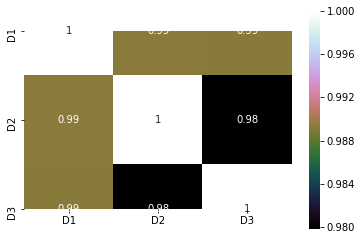

In [176]:
# Пирсон
corr_p = small_df.corr(method='pearson')
sns.heatmap(corr_p, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [177]:
corr_p

,D1,D2,D3
D1,1.000000,0.98930,0.989225
D2,0.989300,1.00000,0.979830
D3,0.989225,0.97983,1.000000


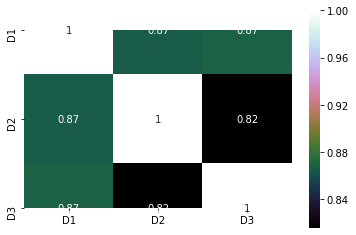

In [178]:
# Кендалл !!!
corr_k = small_df.corr(method='kendall')
sns.heatmap(corr_k, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [179]:
corr_k

,D1,D2,D3
D1,1.000000,0.865373,0.868538
D2,0.865373,1.000000,0.815547
D3,0.868538,0.815547,1.000000


Таблица с p-value

In [180]:
pvalue_table = pd.DataFrame()
pvalue_table.at['D1', 'D1'] = None
pvalue_table.at['D2', 'D2'] = None
pvalue_table.at['D3', 'D3'] = None

pvalue_table.at['D1', 'D2'] = sps.kendalltau(small_df['D1'], small_df['D2'])[1]
pvalue_table.at['D1', 'D3'] = sps.kendalltau(small_df['D1'], small_df['D3'])[1]

pvalue_table.at['D2', 'D1'] = sps.kendalltau(small_df['D2'], small_df['D1'])[1]
pvalue_table.at['D2', 'D3'] = sps.kendalltau(small_df['D2'], small_df['D3'])[1]

pvalue_table.at['D3', 'D1'] = sps.kendalltau(small_df['D3'], small_df['D1'])[1]
pvalue_table.at['D3', 'D2'] = sps.kendalltau(small_df['D3'], small_df['D2'])[1]

In [181]:
pvalue_table

,D1,D2,D3
D1,NaN,2.434795e-43,1.223429e-43
D2,2.434795e-43,NaN,8.820481e-39
D3,1.223429e-43,8.820481e-39,NaN


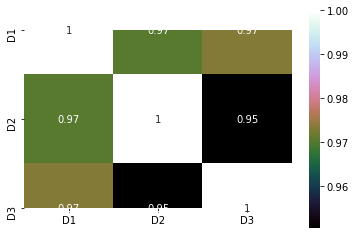

In [182]:
# Спирмен
corr_s = small_df.corr(method='spearman')
sns.heatmap(corr_s, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [183]:
corr_s

,D1,D2,D3
D1,1.000000,0.970434,0.973317
D2,0.970434,1.000000,0.950433
D3,0.973317,0.950433,1.000000


In [184]:
D1r = sps.rankdata(df['D1'])
D2r = sps.rankdata(df['D2'])
D3r = sps.rankdata(df['D3'])
n = 117
W = 0
x = 0
for i in range(n):
    for j in [D1r, D2r, D3r]:
        x += (j[i])
    x = (x - 0.5*3*(n+1))**2
    W += x
    x = 0
W = W * (12/(9*(n**3-n)))
print(W)

0.9764291221041659


In [185]:
stat_w = n * (tau - 1) * W
stat_w

-15.380121561305563

In [186]:
pvalue_w = 1 - sps.chi2.cdf(stat_w, df=n-1)
pvalue_w

1.0

In [187]:
if (pvalue_w < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [188]:
if (pvalue_w < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


In [189]:
if (pvalue_w < 0.1):
    print("H_0 отклоняется")
else:
    print("H_0 принимается")

H_0 принимается


### Задание 9

#### Задание 9.1.1

In [190]:
slope, intercept, rvalue, pvalue, std_err = sps.linregress(df['D4'], df['D1'])
print(slope, intercept, rvalue, pvalue, std_err)

0.6136668085777299 47.819306610262174 0.8447950985552115 5.146345707630607e-33 0.036245918768573394


In [191]:
b0 = intercept
b1 = slope

In [192]:
print(b0, b1)

47.819306610262174 0.6136668085777299


In [193]:
n = len(df['D1'])
n

117

In [194]:
D_yx = sum([(b0 + b1 * x_ - df['D1'].mean()) ** 2 for x_ in df['D4']]) / n
D_yx

102409.52734792508

In [195]:
D_ost_y = sum([(b0 + b1 * x_ - y_) ** 2 for x_, y_ in zip(df['D4'], df['D1'])]) / n
D_ost_y

41085.744330064255

In [196]:
D_y = sum([(y_ - df['D1'].mean()) ** 2 for y_ in df['D1']]) / n
D_y

143495.27167798963

In [197]:
D_y_sum = D_yx + D_ost_y
D_y_sum

143495.27167798934

In [198]:
# погрешность измерений
(D_y_sum - D_y) / D_y * 100

-2.0282083246648096e-13

In [199]:
# dof - degrees of freedom
k = 2
dof_yx = k - 1
dof_ost_y = n - k
dof_y = n - 1
print(dof_yx, dof_ost_y, dof_y)

1 115 116


In [200]:
# несмещенные оценки
print(n * D_yx / (dof_yx), n * D_ost_y / (dof_ost_y), n * D_y / (dof_y))

11981914.699707234 41800.279014065374 144732.29988211024


In [201]:
rvalue # rvalue - коэф детерминации

0.8447950985552115

In [202]:
r_sq = rvalue ** 2 # корр отношение (по нему проверяем)
r_sq

0.7136787585429095

In [203]:
r_sq * 100 # точность

71.36787585429096

$ 0.7 \lt R_{Y|X} \lt 0.9 \Rightarrow $ связь **высокая** (шкала Чеддока)

#### Задание 9.1.2

In [204]:
print('b0') 
for alpha in alphas:
    interval = sps.t.ppf(1 - alpha/2, n - 2) * D_ost_y ** 0.5 * (sum([x_ ** 2 for x_ in df['D4']]) / (n ** 2 * df['D4'].var())) ** 0.5
    print(alpha)
    print(' lower edge:', b0 - interval)
    print(' higher edge:', b0 + interval)
print()
print('b1') 
for alpha in alphas:
    interval = sps.t.ppf(1 - alpha/2, n - 2) * D_ost_y ** 0.5 / (n * df['D4'].var()) ** 0.5
    print(alpha)
    print(' lower edge:', b1 - interval)
    print(' higher edge:', b1 + interval)

b0
0.01
 lower edge: -114.70147788453178
 higher edge: 210.34009110505613
0.05
 lower edge: -75.08664535360363
 higher edge: 170.72525857412796
0.1
 lower edge: -55.07009546497625
 higher edge: 150.7087086855006

b1
0.01
 lower edge: 0.5199474210735104
 higher edge: 0.7073861960819494
0.05
 lower edge: 0.5427917474310401
 higher edge: 0.6845418697244198
0.1
 lower edge: 0.5543345098004273
 higher edge: 0.6729991073550325


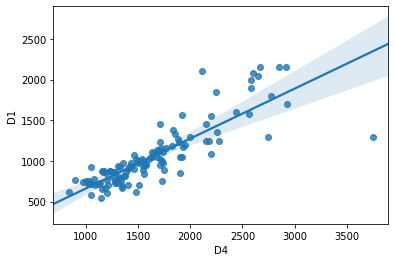

In [205]:
sns.regplot(df['D4'], df['D1']);

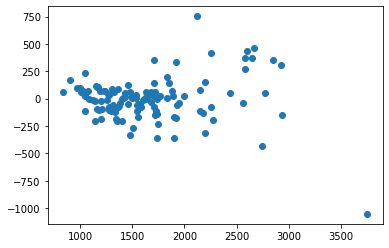

In [206]:
plt.plot(df['D4'], [y_ - (b0 + b1 * x_) for x_, y_ in zip(df['D4'], df['D1'])], 'o')
plt.show()

#### Задание 9.1.3

In [207]:
z = r_sq * (len(df['D1'])-2) / (1 - r_sq)
f = sps.f.cdf(z, dfn=1, dfd=len(df['D1'])-2)
pvalue = 1 - f
print(z, pvalue) # по pvalue - значимость 

286.6467636657494 1.1102230246251565e-16


#### Задание 9.2.1

In [208]:
F = np.array([[1, x_, x_ ** 2] for x_ in df['D4']])
b = np.linalg.inv(F.transpose().dot(F)).dot(F.transpose()).dot(np.array(df['D1']))
print(b)

[-3.70975983e+02  1.08606622e+00 -1.20539875e-04]


In [209]:
b0 = b[0]
b1 = b[1]
b2 = b[2]

In [210]:
print(b0, b1, b2)

-370.97598342488607 1.0860662182539396 -0.00012053987499573664


In [211]:
n = len(df['D1'])
n

117

In [212]:
D_yx = sum([(b0 + b1 * x_ + b2 * (x_ ** 2) - df['D1'].mean()) ** 2 for x_ in df['D4']]) / n
D_yx

104708.45378813847

In [213]:
D_ost_y = sum([(b0 + b1 * x_ + b2 * (x_ ** 2) - y_) ** 2 for x_, y_ in zip(df['D4'], df['D1'])]) / n
D_ost_y

38786.817889847465

In [214]:
D_y = sum([(y_ - df['D1'].mean()) ** 2 for y_ in df['D1']]) / n
D_y

143495.27167798963

In [215]:
D_y_sum = D_yx + D_ost_y
D_y_sum

143495.27167798593

In [216]:
# погрешность измерений
(D_y_sum - D_y) / D_y * 100

-2.5758245723243082e-12

In [217]:
# dof - degrees of freedom
k = 3
dof_yx = k - 1
dof_ost_y = n - k
dof_y = n - 1
print(dof_yx, dof_ost_y, dof_y)

2 114 116


In [218]:
# несмещенные оценки
print(n * D_yx / (dof_yx), n * D_ost_y / (dof_ost_y), n * D_y / (dof_y))

6125444.546606101 39807.52362379082 144732.29988211024


In [219]:
(D_yx / D_y) ** 0.5 # коэф детерминации

0.8542246073156171

In [220]:
(D_yx / D_y) # корр отношение (по нему проверяем)

0.7296996797435203

$ 0.7 \lt R_{Y|X} \lt 0.9 \Rightarrow $ связь **высокая** (шкала Чеддока)

#### Задание 9.2.2

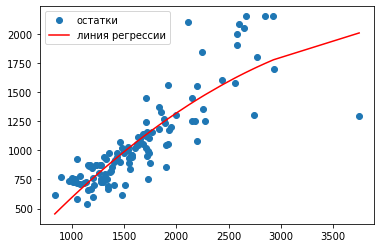

In [221]:
plt.plot(df['D4'], df['D1'], 'o', label='остатки')
x_sorted = sorted(list(df['D4']))
plt.plot(x_sorted, [b[0] + b[1] * x_ + b[2] * x_ ** 2 for x_ in x_sorted], 'r', label='линия регрессии')
plt.legend()
plt.show()

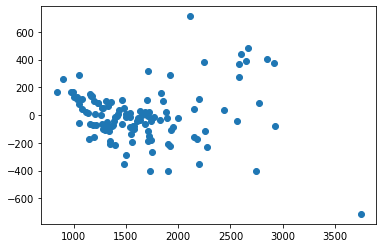

In [222]:
plt.plot(df['D4'], [y_ - (b0 + b1 * x_ + b2 * (x_ ** 2)) for x_, y_ in zip(df['D4'], df['D1'])], 'o')
plt.show()

#### Задание 9.2.3

In [223]:
rvalue = (D_yx / D_y) ** 0.5 # rvalue - коэф детерминации
rvalue

0.8542246073156171

In [224]:
(D_yx / D_y) # корр отношение (по нему проверяем)

0.7296996797435203

In [225]:
z = rvalue ** 2 * dof_ost_y / ((1 - rvalue ** 2) * dof_yx)
f = sps.f.cdf(z, dfn=dof_yx, dfd=dof_ost_y)
print(z, 1 - f)

153.8765537011367 1.1102230246251565e-16


#### Задание 9.3

In [226]:
F = np.array([[1, x1_, x2_] for x1_, x2_ in zip(df['D4'], df['D6'])])
b = np.linalg.inv(F.transpose().dot(F)).dot(F.transpose()).dot(np.array(df['D1']))
print(b)

[-1.5588177   0.5842183  27.78585058]


In [227]:
b0 = b[0]
b1 = b[1]
b2 = b[2]

In [228]:
print(b0, b1, b2)

-1.558817701628783 0.5842183005864691 27.785850579439316


In [229]:
n = len(df['D1'])
n

117

In [230]:
D_yx = sum([(b0 + b1 * x1_ + b2 * x2_ - df['D1'].mean()) ** 2 for x1_, x2_ in zip(df['D4'], df['D6'])]) / n
D_yx

103685.76795554638

In [231]:
D_ost_y = sum([(b0 + b1 * x1_ + b2 * x2_ - y_) ** 2 for x1_, x2_, y_ in zip(df['D4'], df['D6'], df['D1'])]) / n
D_ost_y

39809.50372244326

In [232]:
D_y = sum([(y_ - df['D1'].mean()) ** 2 for y_ in df['D1']]) / n
D_y

143495.27167798963

In [233]:
D_y_sum = D_yx + D_ost_y
D_y_sum

143495.27167798963

In [234]:
# погрешность измерений
(D_y_sum - D_y) / D_y * 100

0.0

In [235]:
# dof - degrees of freedom
k = 3
dof_yx = k - 1
dof_ost_y = n - k
dof_y = n - 1
print(dof_yx, dof_ost_y, dof_y)

2 114 116


In [236]:
# несмещенные оценки
print(n * D_yx / (dof_yx), n * D_ost_y / (dof_ost_y), n * D_y / (dof_y))

6065617.425399464 40857.12224145493 144732.29988211024


In [237]:
(D_yx / D_y) ** 0.5 # rvalue - коэф детерминации

0.8500427720823513

In [238]:
(D_yx / D_y) # корр отношение (по нему проверяем)

0.7225727143694483

$ 0.7 \lt R_{Y|X} \lt 0.9 \Rightarrow $ связь **высокая** (шкала Чеддока)

In [239]:
rvalue = (D_yx / D_y) ** 0.5 # rvalue - коэф детерминации
rvalue

0.8500427720823513

In [240]:
(D_yx / D_y) # корр отношение (по нему проверяем)

0.7225727143694483

In [241]:
z = rvalue ** 2 * dof_ost_y / ((1 - rvalue ** 2) * dof_yx)
f = sps.f.cdf(z, dfn=dof_yx, dfd=dof_ost_y)
print(z, 1 - f)

148.45924266406362 1.1102230246251565e-16
